<h1 style="text-align: center;">Machine Learning Project<br><br>Handwritten Digits Recognition<br><br>Tayfun Kok<br><h1>

# Dataset Information

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![3Dto2D](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

# Related Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

# Recognizing and Understanding Data

In [2]:
df_train=pd.read_csv("MNIST_train.csv",index_col=False)
df_train.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.shape

(60000, 787)

In [4]:
df_train.drop(columns=["Unnamed: 0", "index"], axis=0, inplace=True)
df_train.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train_array=df_train.to_numpy()
df_train_array

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
X_train=df_train_array[:,1:]
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
y_train=df_train_array[:,0]
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [8]:
X_train_shaped=X_train.reshape(60000,28,28)

In [9]:
y_train[9]

4

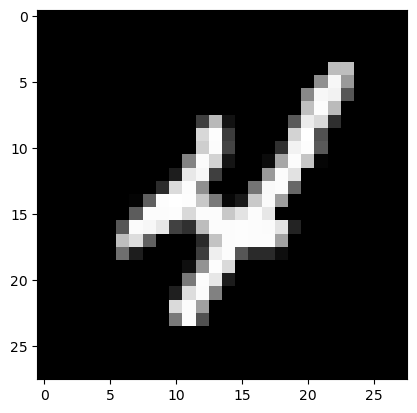

In [10]:
plt.imshow(X_train_shaped[9],cmap='gray');

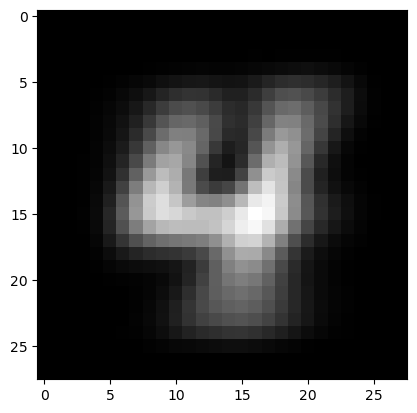

In [11]:
plt.imshow(sum(X_train[y_train==4,:]/len(X_train[y_train==4,:])).reshape(28,28), cmap='gray');

In [12]:
y_train[140]

7

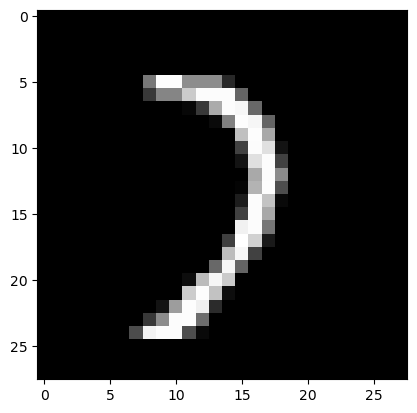

In [13]:
plt.imshow(X_train_shaped[140],cmap='gray');

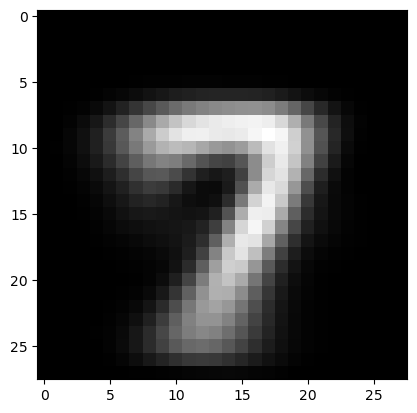

In [14]:
plt.imshow(sum(X_train[y_train==7,:]/len(X_train[y_train==7,:])).reshape(28,28), cmap='gray');

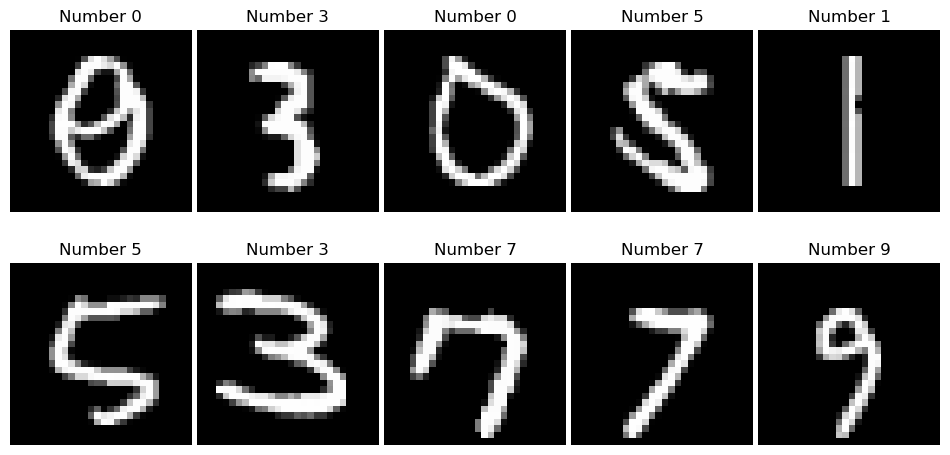

In [15]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index =np.random.randint(0,60001)
        ax[r,c].axis("off")
        ax[r,c].set_title('Number %d' % y_train[image_index])
        ax[r,c].imshow(X_train_shaped[image_index], cmap='gray') 
        
plt.show()

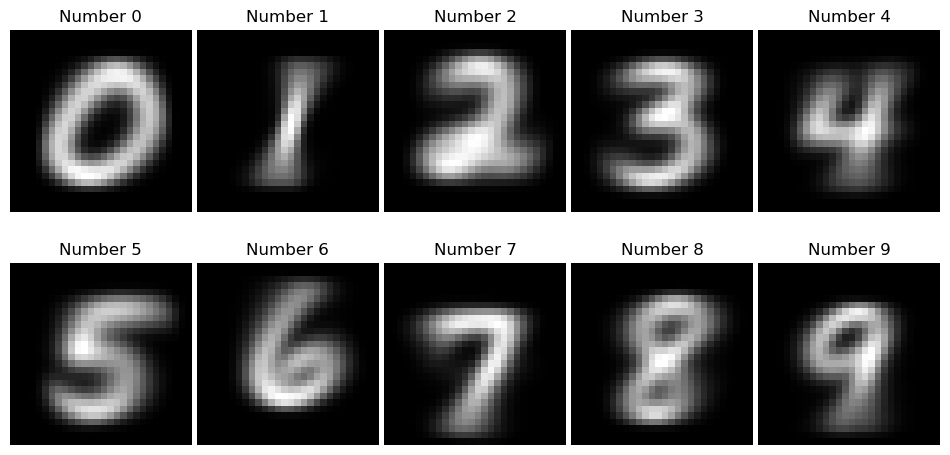

In [16]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)
k=-1

for r in range(num_rows):
    for c in range(num_cols):
      
        k +=1
        ax[r,c].axis("off")
        ax[r,c].set_title('Number %d' % k)
        ax[r,c].imshow(sum(X_train[y_train==k,:]/len(X_train[y_train==k,:])).reshape(28,28), cmap='gray') 
        
plt.show()

      

In [17]:
df_test=pd.read_csv("MNIST_test.csv")
df_test.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_test.shape

(10000, 787)

In [19]:
df_test.drop(columns=["Unnamed: 0", "index"], axis=0, inplace=True)
df_test.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_test_array=df_test.to_numpy()
df_test_array

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
X_test=df_test_array[:,1:]
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
y_test=df_test_array[:,0]
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
X_test_shaped=X_test.reshape(10000,28,28)

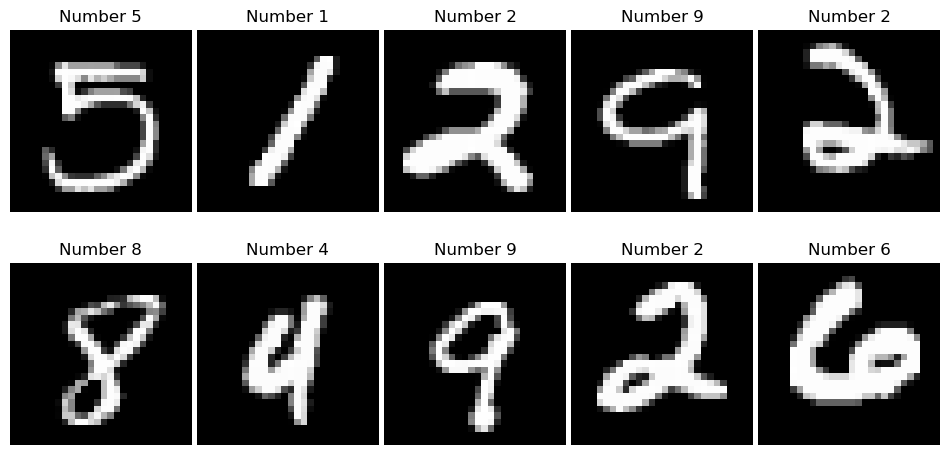

In [24]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index =np.random.randint(0,10001)
        ax[r,c].axis("off")
        ax[r,c].set_title('Number %d' % y_test[image_index])
        ax[r,c].imshow(X_test_shaped[image_index], cmap='gray') 
        
plt.show()

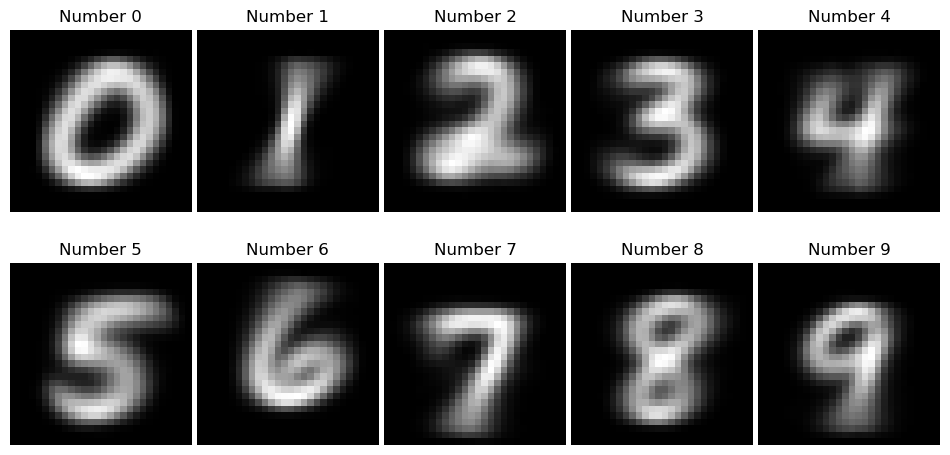

In [25]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)
k=-1

for r in range(num_rows):
    for c in range(num_cols):
      
        k +=1
        ax[r,c].axis("off")
        ax[r,c].set_title('Number %d' % k)
        ax[r,c].imshow(sum(X_test[y_test==k,:]/len(X_test[y_test==k,:])).reshape(28,28), cmap='gray') 
        
plt.show()

# Data Preprocessing

In [26]:
def min_max(X):
    return (X-X.min())/(X.max()-X.min())

In [27]:
X_train_norm=min_max(X_train)
X_test_norm=min_max(X_test)

# Models Implementation to all MNIST Dataset

## Gaussian Naive Bayes

In [28]:
class GaussNB():

  def fit(self, X,y, epsilon=1e-2):
    self.likelihoods =dict()
    self.priors =dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k=X[y==k,:]

      self.likelihoods[k]= {"mean":X_k.mean(axis=0), "cov": X_k.var(axis=0) +epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):

    N, D= X.shape
    P_hat=np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      #Apply Bayes Theorem
      P_hat[:,k]=mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [29]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [30]:
gnb=GaussNB()

In [31]:
gnb.fit(X_train_norm,y_train)

In [32]:
y_train_hat=gnb.predict(X_train_norm)
y_train_hat

array([3, 0, 4, ..., 5, 6, 8], dtype=int64)

In [33]:
accuracy(y_train,y_train_hat)

0.8015833333333333

In [34]:
y_test_hat=gnb.predict(X_test_norm)

In [35]:
gnb_ac=accuracy(y_test,y_test_hat)
gnb_ac

0.8141

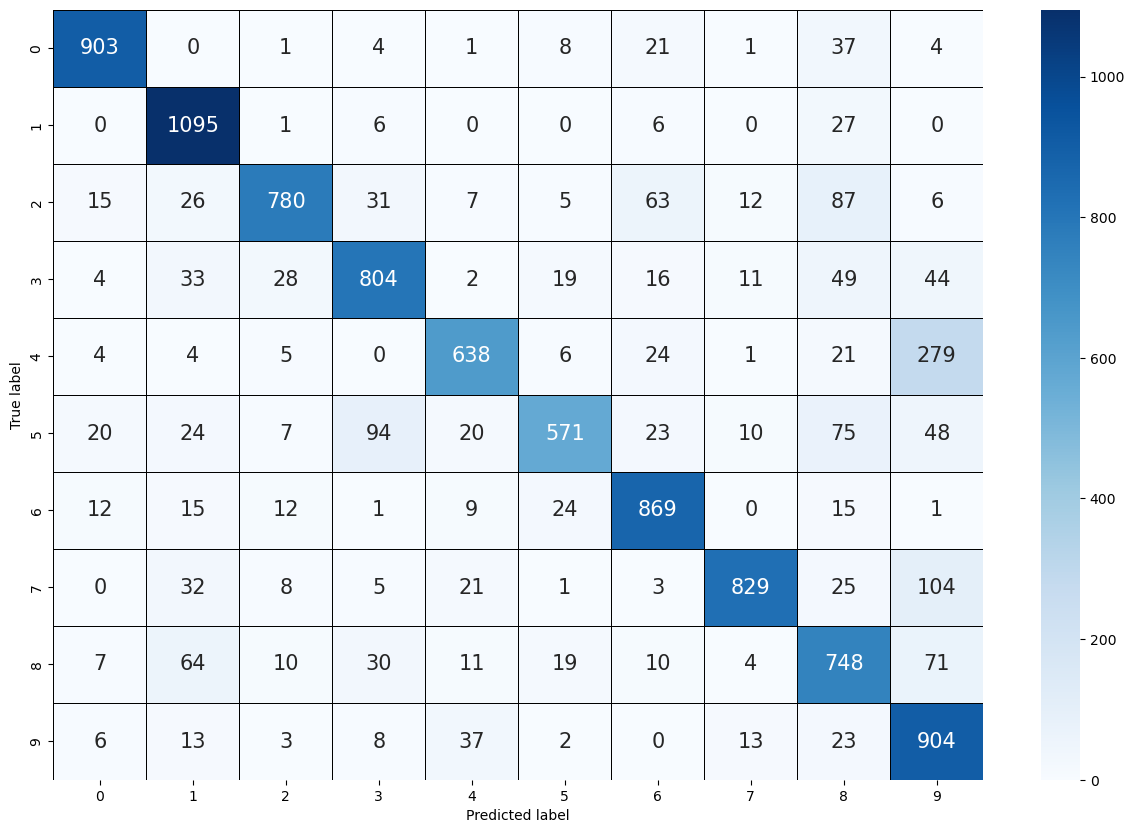

In [36]:
plt.figure(figsize=(15,10))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

**Prediction**

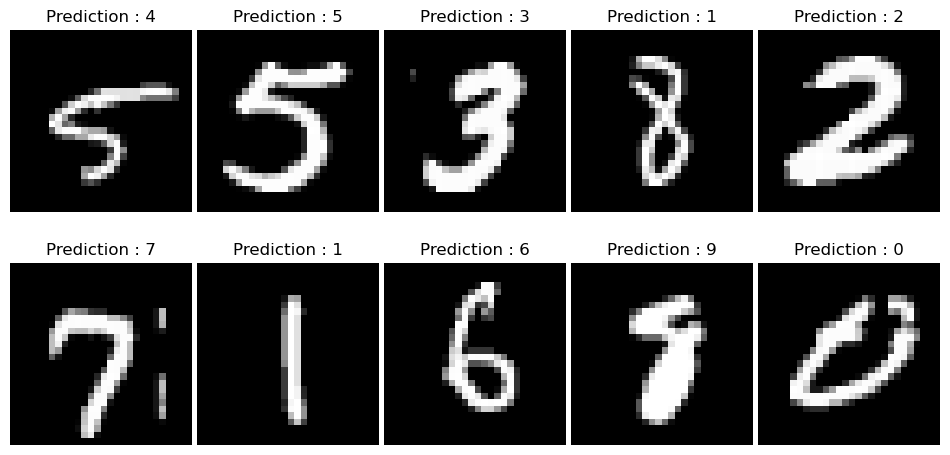

In [37]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index =np.random.randint(0,10001)
        ax[r,c].axis("off")
        ax[r,c].set_title('Prediction : %d' % gnb.predict(X_test_norm[image_index].reshape(1,784)))
        ax[r,c].imshow(X_test_norm[image_index].reshape(28,28), cmap='gray')
        
plt.show()

In [38]:
X_test_norm[y_test==4].shape

(982, 784)

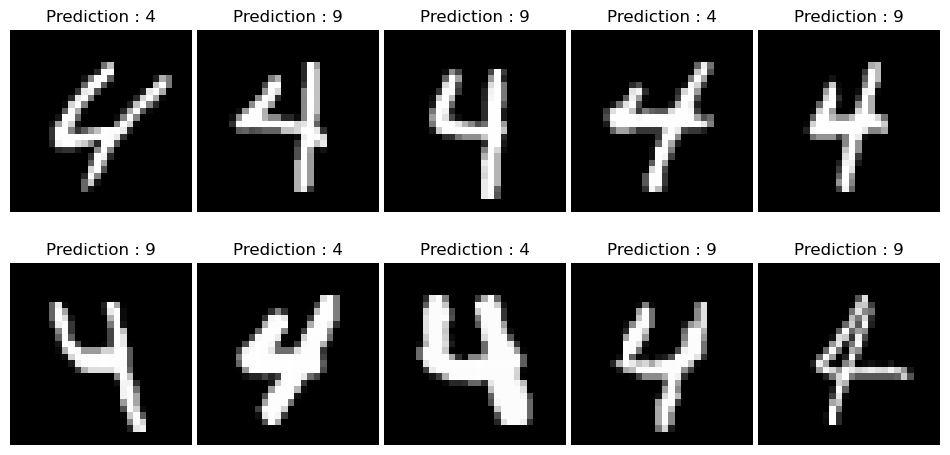

In [39]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index =np.random.randint(0,983)
        ax[r,c].axis("off")
        ax[r,c].set_title('Prediction : %d' % gnb.predict(X_test_norm[y_test==4][image_index].reshape(1,784)))
        ax[r,c].imshow(X_test_norm[y_test==4][image_index].reshape(28,28), cmap='gray')
        
plt.show()

In [40]:
X_test_norm[y_test==7].shape

(1028, 784)

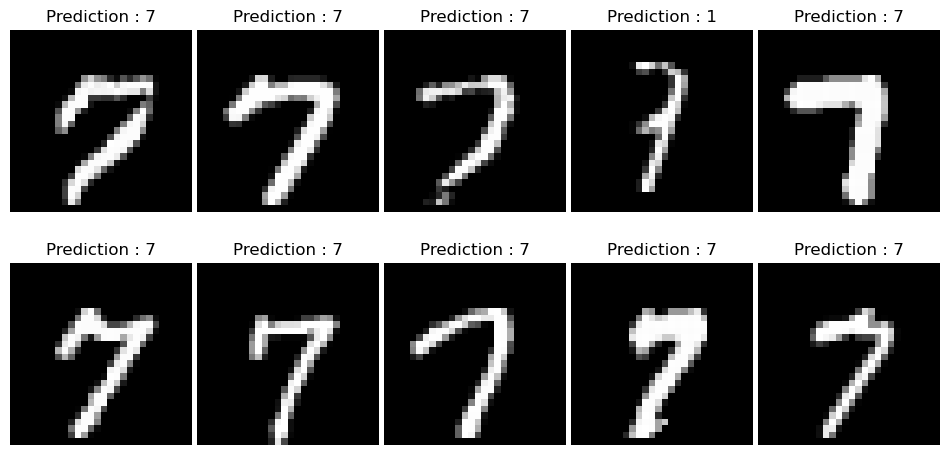

In [41]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index =np.random.randint(0,1029)
        ax[r,c].axis("off")
        ax[r,c].set_title('Prediction : %d' % gnb.predict(X_test_norm[y_test==7][image_index].reshape(1,784)))
        ax[r,c].imshow(X_test_norm[y_test==7][image_index].reshape(28,28), cmap='gray')
        
plt.show()

## Gaussian Bayes

In [42]:
class GaussBayes():
    
    def fit(self, X,y,epsilon=1e-1):
        self.likelihoods=dict()
        self.priors=dict()
        
        self.K=set(y.astype(int))
        
        for k in self.K:
            X_k=X[y==k, :]
            N_k,D=X_k.shape
            mu_k=X_k.mean(axis=0)
        
            self.likelihoods[k]={"mean":X_k.mean(axis=0),
                        "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T, X_k-mu_k)+epsilon*np.identity(D)}
        
            self.priors[k]=len(X_k)/len(X)
     
    def predict(self, X):
        
        N,D=X.shape
            
        P_hat=np.zeros((N, len(self.K)))
            
        for k, l in self.likelihoods.items():
          #Apply Bayes Theorem
             P_hat[:,k]=mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])

        return P_hat.argmax(axis=1)

In [43]:
gb=GaussBayes()

In [44]:
gb.fit(X_train_norm,y_train)

In [45]:
y_train_hat=gb.predict(X_train_norm)
y_train_hat

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [46]:
accuracy(y_train,y_train_hat)

0.9549333333333333

In [47]:
y_test_hat=gb.predict(X_test_norm)

In [48]:
gb_ac=accuracy(y_test,y_test_hat)
gb_ac

0.9542

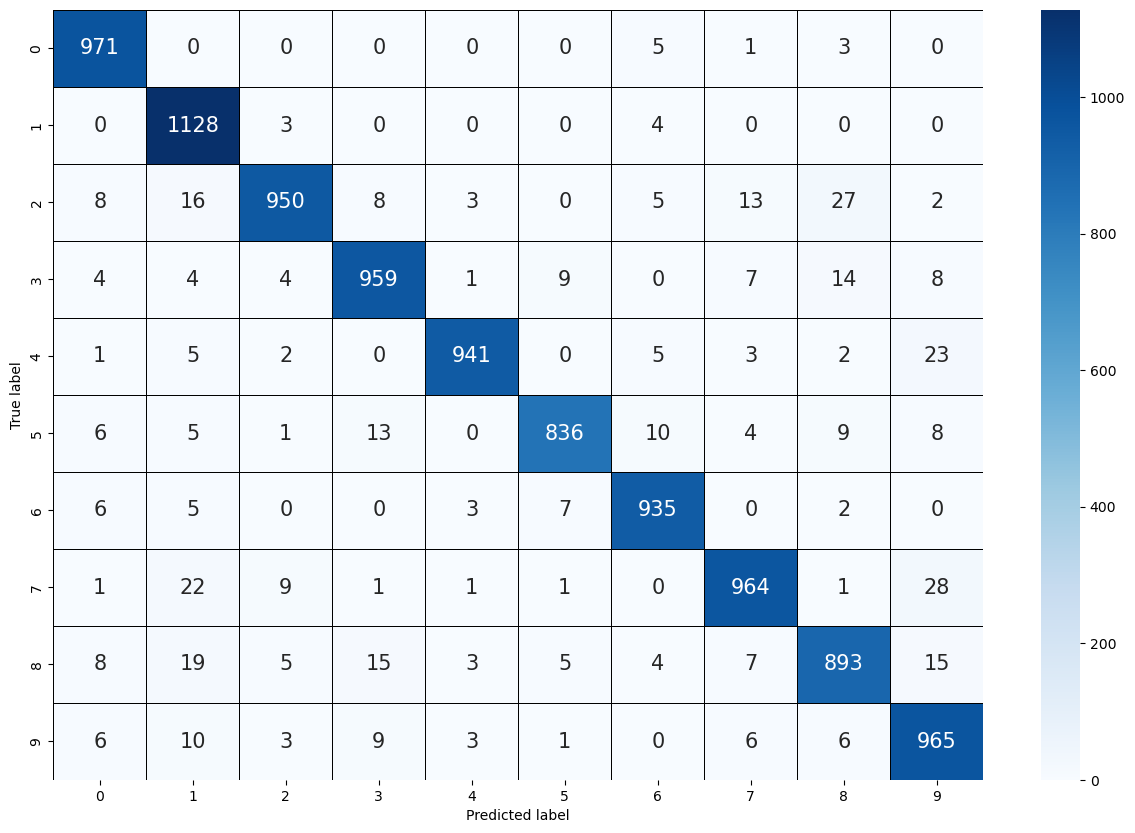

In [49]:
plt.figure(figsize=(15,10))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

**Prediction**

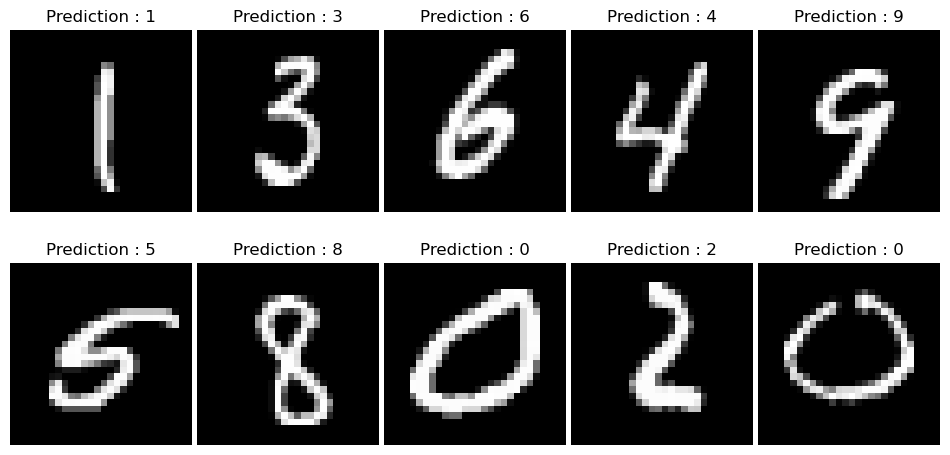

In [50]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index =np.random.randint(0,10001)
        ax[r,c].axis("off")
        ax[r,c].set_title('Prediction : %d' % gb.predict(X_test_norm[image_index].reshape(1,784)))
        ax[r,c].imshow(X_test_norm[image_index].reshape(28,28), cmap='gray')
        
plt.show()

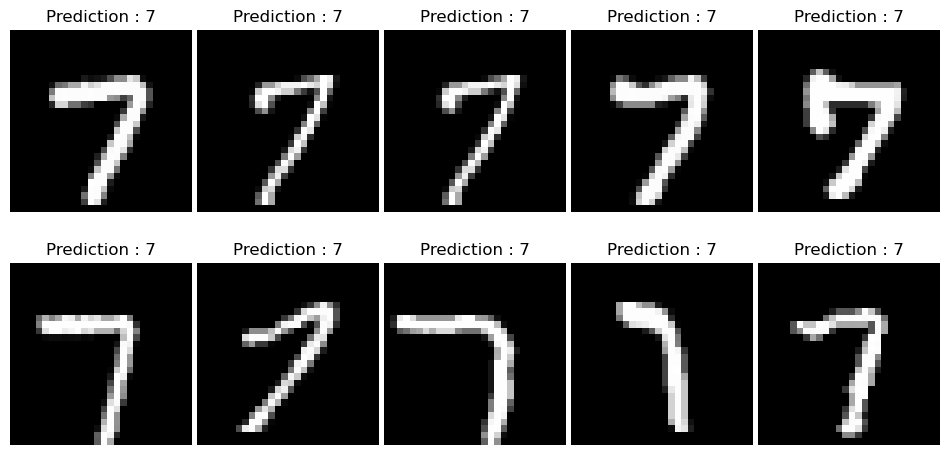

In [51]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index =np.random.randint(0,1029)
        ax[r,c].axis("off")
        ax[r,c].set_title('Prediction : %d' % gb.predict(X_test_norm[y_test==7][image_index].reshape(1,784)))
        ax[r,c].imshow(X_test_norm[y_test==7][image_index].reshape(28,28), cmap='gray')
        
plt.show()

## Comparing Models 

**Comparing Models for all MNIST dataset**

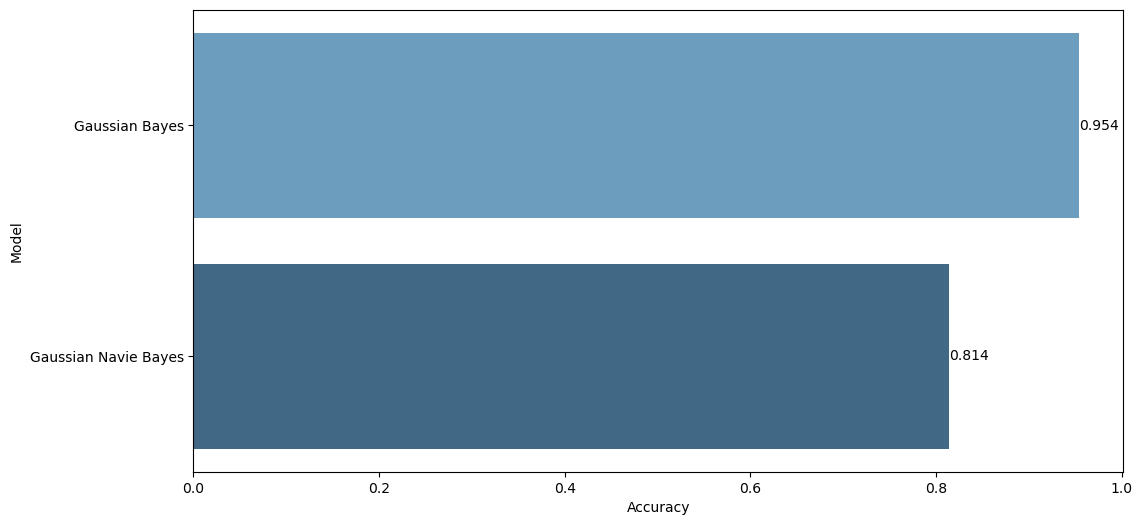

In [52]:
compare = pd.DataFrame({"Model": ["Gaussian Navie Bayes", "Gaussian Bayes"],
                        "Accuracy": [gnb_ac, gb_ac]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(12,6))
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Models Implementation to Sample MNIST Dataset

In [53]:
df_train["labels"].value_counts(normalize=True)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: labels, dtype: float64

In [54]:
df_train_sample=df_train.sample(10000)

In [55]:
df_train_sample["labels"].value_counts(normalize=True)

1    0.1143
7    0.1023
0    0.1020
6    0.1018
3    0.1016
9    0.1000
8    0.0958
2    0.0951
4    0.0950
5    0.0921
Name: labels, dtype: float64

In [56]:
df_train_sample=df_train_sample.to_numpy()

In [57]:
X_train_sample=df_train_sample[:,1:]
y_train_sample=df_train_sample[:,0]

In [58]:
X_train_sample=min_max(X_train_sample)

In [59]:
df_test["labels"].value_counts(normalize=True)

1    0.1135
2    0.1032
7    0.1028
3    0.1010
9    0.1009
4    0.0982
0    0.0980
8    0.0974
6    0.0958
5    0.0892
Name: labels, dtype: float64

In [60]:
df_test_sample=df_test.sample(5000)

In [61]:
df_test_sample["labels"].value_counts(normalize=True)

1    0.1122
0    0.1052
2    0.1044
9    0.1030
3    0.1022
4    0.1000
7    0.0984
8    0.0946
6    0.0900
5    0.0900
Name: labels, dtype: float64

In [62]:
df_test_sample=df_test_sample.to_numpy()

In [63]:
X_test_sample=df_test_sample[:,1:]
y_test_sample=df_test_sample[:,0]

In [64]:
X_test_sample=min_max(X_test_sample)

## Gaussian Naive Bayes

In [65]:
gnb=GaussNB()

In [66]:
gnb.fit(X_train_sample,y_train_sample)

In [67]:
y_train_sample_hat=gnb.predict(X_train_sample)

In [68]:
accuracy(y_train_sample,y_train_sample_hat)

0.8069

In [69]:
y_test_sample_hat=gnb.predict(X_test_sample)

In [70]:
gnb_sample_ac=accuracy(y_test_sample,y_test_sample_hat)
gnb_sample_ac

0.7992

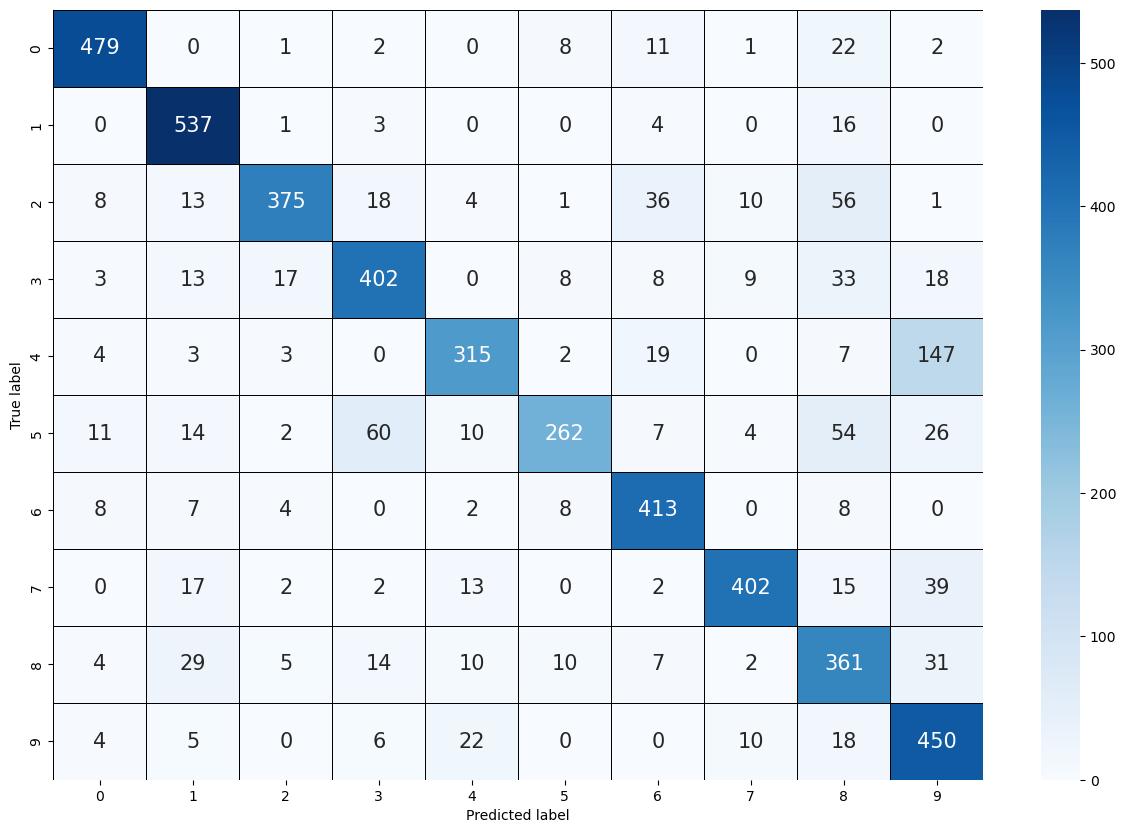

In [71]:
plt.figure(figsize=(15,10))
y_actu = pd.Series(y_test_sample, name='Actual')
y_pred = pd.Series(y_test_sample_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

## Gaussian Bayes

In [72]:
gb=GaussBayes()

In [73]:
gb.fit(X_train_sample,y_train_sample)

In [74]:
y_train_sample_hat=gb.predict(X_train_sample)

In [75]:
accuracy(y_train_sample,y_train_sample_hat)

0.9735

In [76]:
y_test_sample_hat=gb.predict(X_test_sample)

In [77]:
gb_sample_ac=accuracy(y_test_sample,y_test_sample_hat)
gb_sample_ac

0.9506

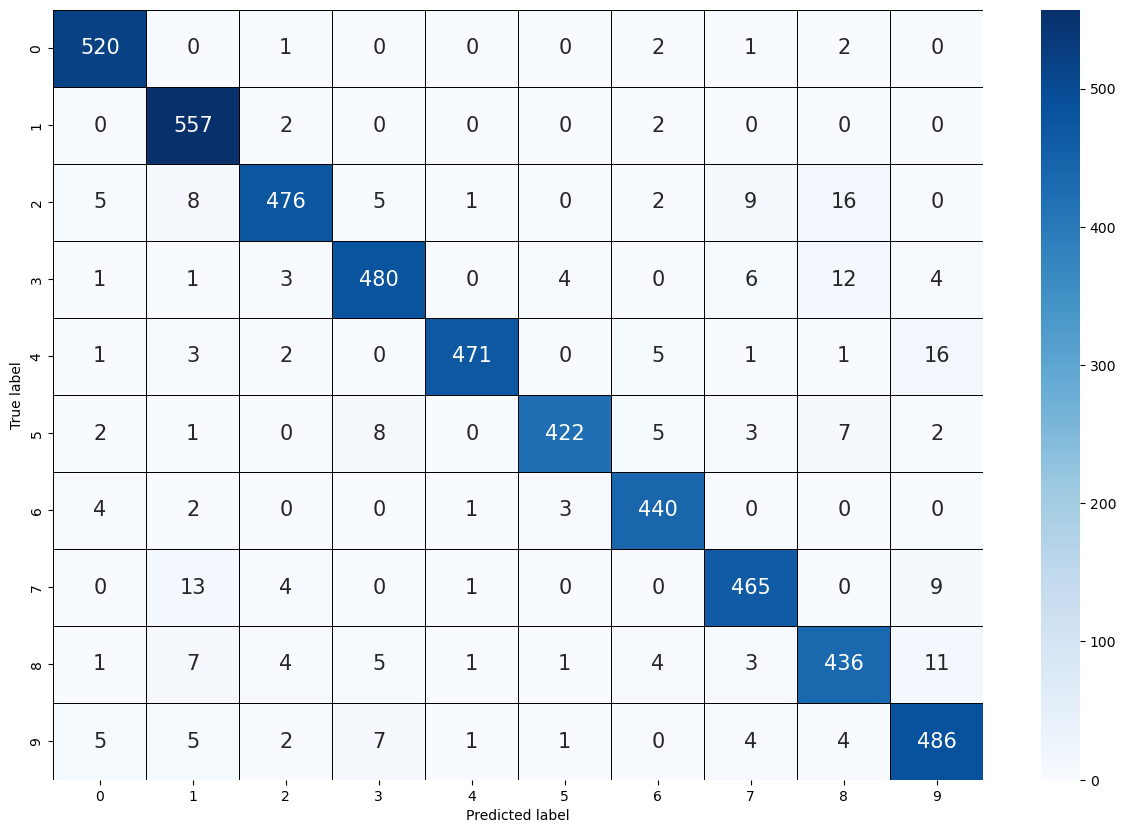

In [78]:
plt.figure(figsize=(15,10))
y_actu = pd.Series(y_test_sample, name='Actual')
y_pred = pd.Series(y_test_sample_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

## K-Nearest Neighbors (KNN)​

In [79]:
class KNN():
    
    def fit(self, X,y):
        self.X=X
        self.y=y
    
    def predict(self,X,K):
        epsilon=1e-4
        N=len(X)
        y_hat=np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2, axis=1)
            idxt=np.argsort(dist2)[:K]
            gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
            y_hat[i]=np.bincount(self.y[idxt], weights=gamma_k).argmax()
        
        return y_hat

In [80]:
knn=KNN()

In [81]:
knn.fit(X_train_sample,y_train_sample)

In [82]:
y_train_sample_hat=knn.predict(X_train_sample,5)

In [83]:
accuracy(y_train_sample,y_train_sample_hat)

1.0

In [84]:
y_test_sample_hat=knn.predict(X_test_sample,5)

In [85]:
knn_sample_ac=accuracy(y_test_sample,y_test_sample_hat)
knn_sample_ac

0.9492

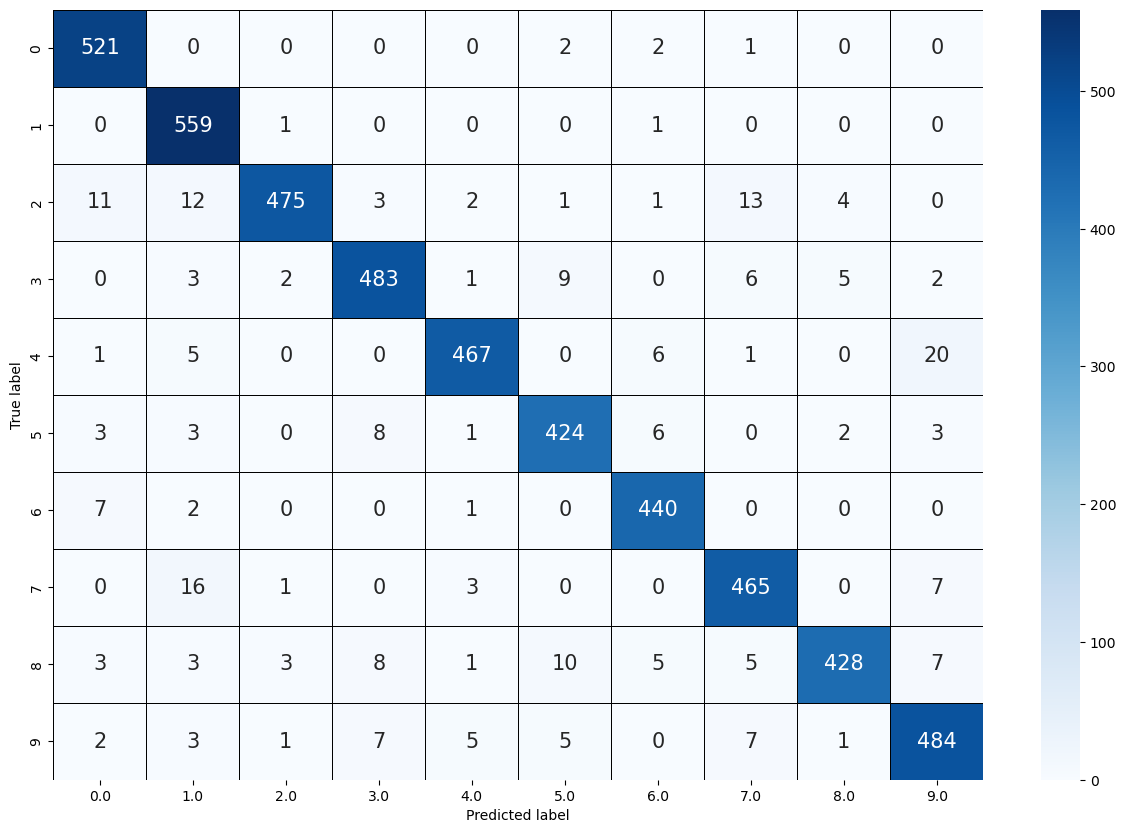

In [86]:
plt.figure(figsize=(15,10))
y_actu = pd.Series(y_test_sample, name='Actual')
y_pred = pd.Series(y_test_sample_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

**Prediction**

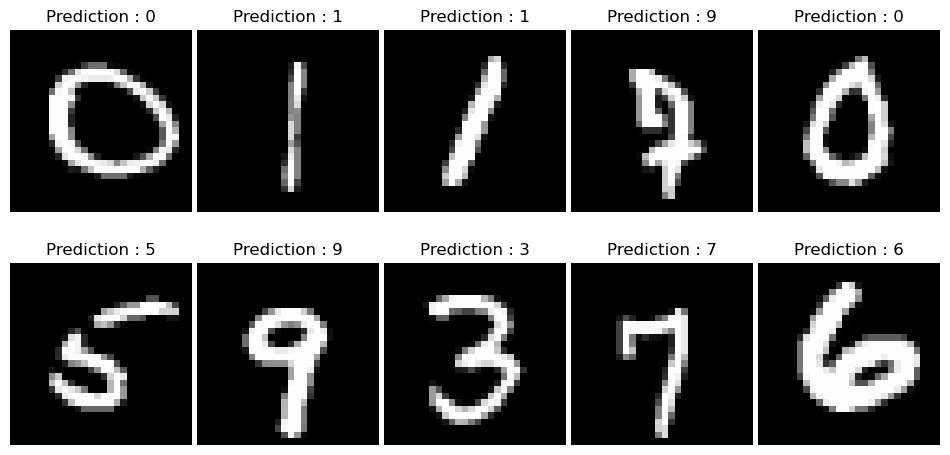

In [87]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index =np.random.randint(0,5001)
        ax[r,c].axis("off")
        ax[r,c].set_title('Prediction : %d' % knn.predict(X_test_sample[image_index].reshape(1,784),5))
        ax[r,c].imshow(X_test_sample[image_index].reshape(28,28), cmap='gray')
        
plt.show()

In [88]:
X_test_sample[y_test_sample==4].shape

(500, 784)

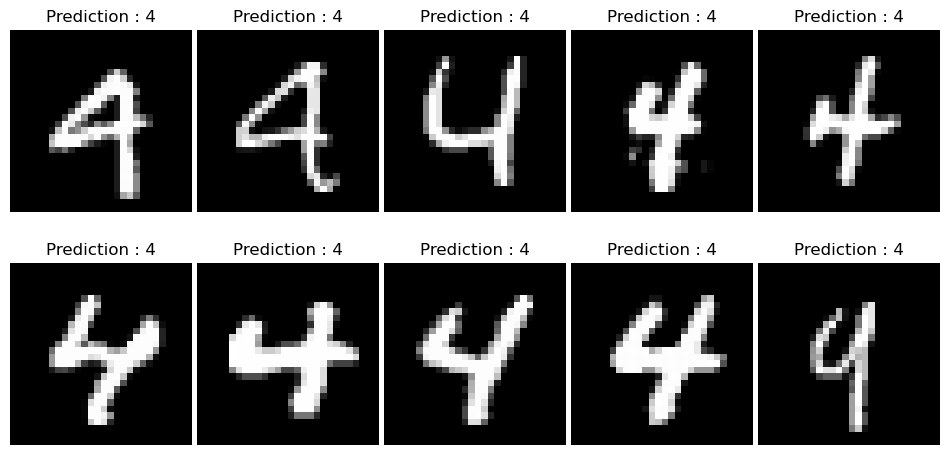

In [89]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index =np.random.randint(0,486)
        ax[r,c].axis("off")
        ax[r,c].set_title('Prediction : %d' % knn.predict(X_test_sample[y_test_sample==4][image_index].reshape(1,784),5))
        ax[r,c].imshow(X_test_sample[y_test_sample==4][image_index].reshape(28,28), cmap='gray')
        
plt.show()

In [90]:
X_test_sample[y_test_sample==7].shape

(492, 784)

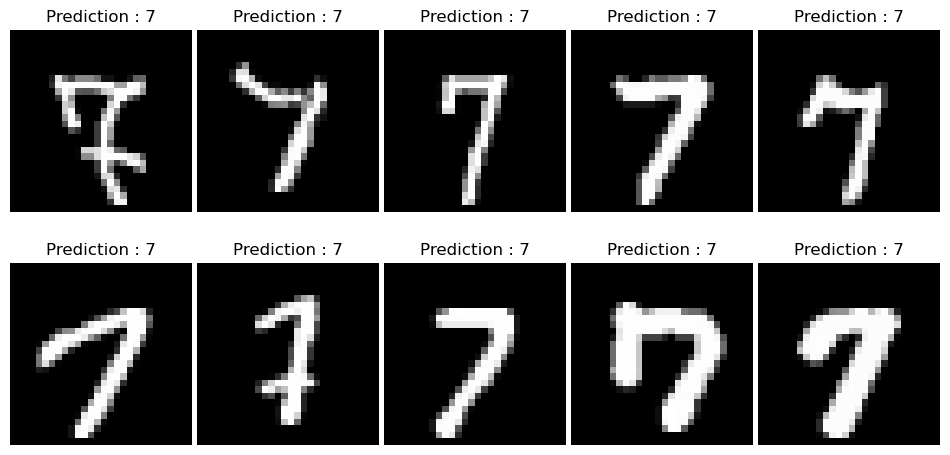

In [91]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,6),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index =np.random.randint(0,509)
        ax[r,c].axis("off")
        ax[r,c].set_title('Prediction : %d' % knn.predict(X_test_sample[y_test_sample==7][image_index].reshape(1,784),5))
        ax[r,c].imshow(X_test_sample[y_test_sample==7][image_index].reshape(28,28), cmap='gray')
        
plt.show()

## Comparing Models 

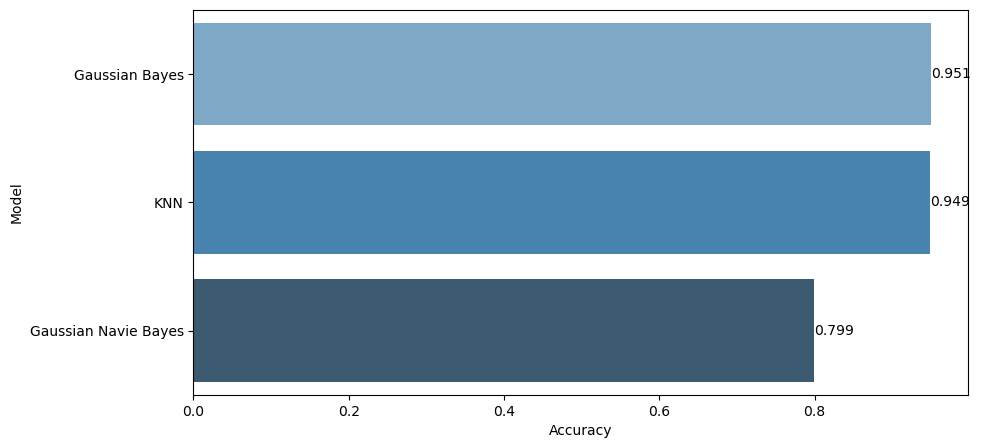

In [92]:
compare = pd.DataFrame({"Model": ["Gaussian Navie Bayes", "Gaussian Bayes", "KNN"],
                        "Accuracy": [gnb_sample_ac, gb_sample_ac, knn_sample_ac]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(10,5))
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Conclusion

* Gaussian Base model gives the best performance for both whole dataset and sample dataset. 

* Also, the model performance of the sample dataset and the whole dataset are very close to each other.

* Therefore, it may be better in terms of cost to apply the model to the smaller sample dataset rather than applying the model the whole dataset.